**Importing the Necessary Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array


**Loading the Olivetti faces dataset**

In [ ]:
data = fetch_olivetti_faces()
images = data.images
targets = data.target

In [ ]:
data

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

**Visualizing all images in the dataset along with their class labels**

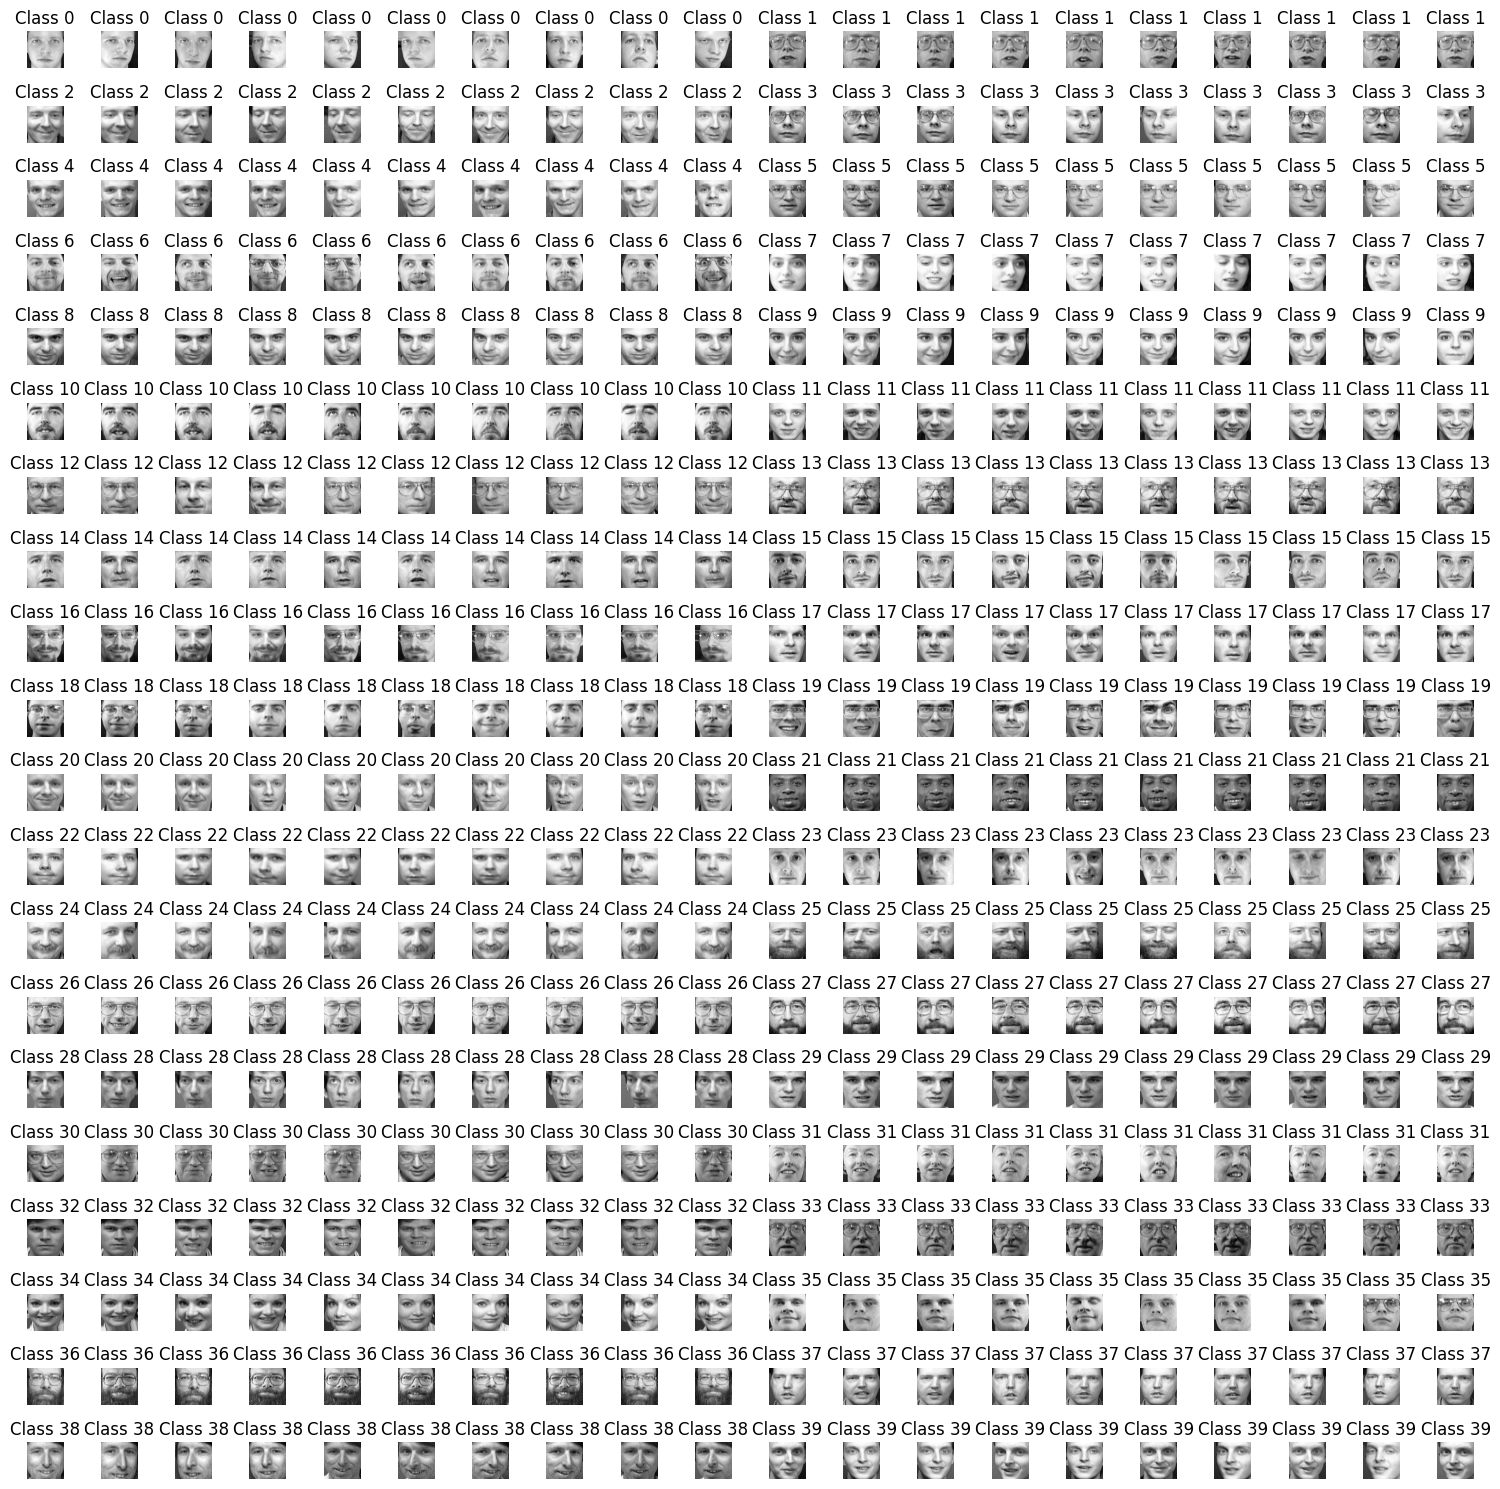

In [ ]:
# Number of images
num_images = images.shape[0]

# Determine the grid size
grid_size = int(np.ceil(np.sqrt(num_images)))

# Create a figure to hold the grid of images
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

# Loop through the images and add them to the grid
for i in range(grid_size * grid_size):
    ax = axes[i // grid_size, i % grid_size]
    if i < num_images:
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f'Class {targets[i]}')
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

**Preprocessing the images and labels**

In [ ]:
# Reshape images to include the channel dimension
images = images.reshape((images.shape[0], images.shape[1], images.shape[2], 1))

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
targets = encoder.fit_transform(targets.reshape(-1, 1))

In [ ]:
images

array([[[[0.30991736],
         [0.3677686 ],
         [0.41735536],
         ...,
         [0.37190083],
         [0.3305785 ],
         [0.30578512]],

        [[0.3429752 ],
         [0.40495867],
         [0.43801653],
         ...,
         [0.37190083],
         [0.338843  ],
         [0.3140496 ]],

        [[0.3429752 ],
         [0.41735536],
         [0.45041323],
         ...,
         [0.38016528],
         [0.338843  ],
         [0.29752067]],

        ...,

        [[0.21487603],
         [0.20661157],
         [0.2231405 ],
         ...,
         [0.15289256],
         [0.16528925],
         [0.17355372]],

        [[0.20247933],
         [0.2107438 ],
         [0.2107438 ],
         ...,
         [0.14876033],
         [0.16115703],
         [0.16528925]],

        [[0.20247933],
         [0.20661157],
         [0.20247933],
         ...,
         [0.15289256],
         [0.16115703],
         [0.1570248 ]]],


       [[[0.45454547],
         [0.47107437],
         [0.51

In [ ]:
targets

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Building and training a Convolutional Neural Network (CNN) model**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
9/9 [==============================] - 4s 276ms/step - loss: 3.7238 - accuracy: 0.0174 - val_loss: 3.6854 - val_accuracy: 0.0000e+00
Epoch 2/20
9/9 [==============================] - 1s 151ms/step - loss: 3.6811 - accuracy: 0.0556 - val_loss: 3.6747 - val_accuracy: 0.0938
Epoch 3/20
9/9 [==============================] - 1s 149ms/step - loss: 3.6587 - accuracy: 0.0521 - val_loss: 3.6489 - val_accuracy: 0.0938
Epoch 4/20
9/9 [==============================] - 1s 158ms/step - loss: 3.6304 - accuracy: 0.0729 - val_loss: 3.5970 - val_accuracy: 0.0625
Epoch 5/20
9/9 [==============================] - 1s 151ms/step - loss: 3.5559 - accuracy: 0.0764 - val_loss: 3.5294 - val_accuracy: 0.3125
Epoch 6/20
9/9 [==============================] - 1s 151ms/step - loss: 3.4231 - accuracy: 0.1319 - val_loss: 3.3617 - val_accuracy: 0.2500
Epoch 7/20
9/9 [==============================] - 1s 153ms/step - loss: 3.2249 - accuracy: 0.2083 - val_loss: 3.2076 - val_accuracy: 0.2812
Epoch 8/20
9/9 [

**Evaluating the Model's  Performance**

3/3 [==============================] - 0s 31ms/step - loss: 0.5509 - accuracy: 0.9000
Test accuracy: 90.00%
3/3 [==============================] - 0s 30ms/step
Overall Precision: 92.35%
Overall Recall: 90.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


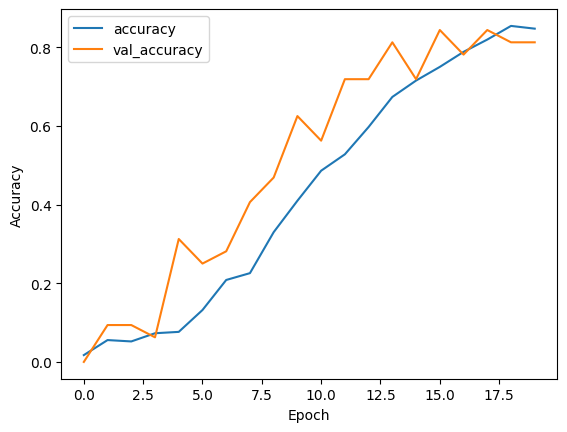

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate precision and recall
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
print(f'Overall Precision: {precision * 100:.2f}%')
print(f'Overall Recall: {recall * 100:.2f}%')

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



**Predicting the class of a new image**

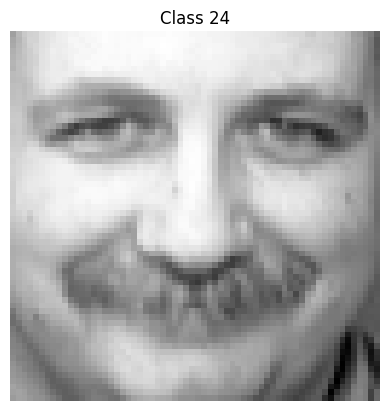

In [ ]:
def show_image_for_class(class_index, images, targets):

    # Find the first image for the given class
    for i, label in enumerate(targets):
        if label == class_index:
            plt.imshow(images[i].reshape(64, 64), cmap='gray')
            plt.title(f'Class {class_index}')
            plt.axis('off')
            plt.show()
            break

# Show the image corresponding to the predicted class
predicted_class = 24
show_image_for_class(predicted_class, data.images, data.target)


In [ ]:
# Function to preprocess and predict a new image

def predict_image(image_path, model, encoder):
    # Load and preprocess the image
    img = load_img(image_path, color_mode='grayscale', target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1, 64, 64, 1))
    img_array = img_array.astype('float32') / 255.0

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = encoder.inverse_transform(prediction)
    return predicted_class[0], predicted_label[0][0]

image_path = '/content/24.png'
predicted_class, predicted_label = predict_image(image_path, model, encoder)
print(f'Predicted Class: {predicted_class}')
print(f'Predicted Label: {predicted_label}')


1/1 [==============================] - 0s 22ms/step
Predicted Class: 24
Predicted Label: 24
